In [33]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

### Задание 1
**Даны значения величины заработной платы заемщиков банка (salary) и значения их поведенческого кредитного скоринга (scoring):**

**salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]**

**scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]**

**Возьмём в качестве признака значение salary, а в качестве целевой переменной - scoring.**

**Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.**

С помощью формул для парной регрессии:

In [34]:
salary = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
scoring = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

b1 = (np.mean(salary * scoring) - np.mean(salary) * np.mean(scoring)) / (np.mean(salary ** 2) - np.mean(salary) ** 2)
b0 = np.mean(scoring) - b1 * np.mean(salary)

round(b1, 2), round(b0, 2)

(2.62, 444.18)

С помощью метода наименьших квадратов:

In [35]:
x = np.reshape(salary, (-1, 1))

ones = np.ones((x.shape[0], 1))
x = np.hstack((ones, x))  # Присоединяем к x столбец из единиц, соответствующий фиктивному фактору

y = np.reshape(scoring, (-1, 1))

XTX = x.T.dot(x)  # Записываем матрицу  𝑋⊤𝑋
np.linalg.det(XTX)  # Считаем ее определитель

349464.00000000023

Определитель не близок к нулю, значит можем записать аналитическое решение:

In [36]:
XTX_inv = np.linalg.inv(XTX)  # обратная матрица

b = XTX_inv.dot(x.T).dot(y)

b

array([[444.17735732],
       [  2.62053888]])

Модель линейной регрессии имеет вид:

$ у = 444.18 + 2.62 \cdot x $

**Постройте scatter plot по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.**

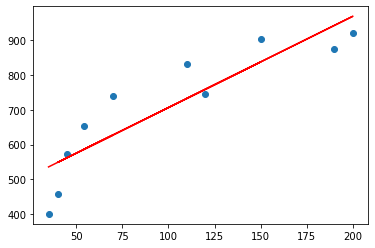

In [37]:
x = salary
y = b0 + b1 * x

plt.scatter(salary, scoring)
plt.plot(x, y, color='red')

**Посчитайте коэффициент детерминации, среднюю ошибку аппроксимации.**

Создаем массив из предсказанных значений:

In [38]:
z = (b0 + b1 * salary).round()

print(f'real: {scoring[:5]}')
print(f'pred: {z[:5]}')

real: [401 574 874 919 459]
pred: [536. 562. 942. 968. 549.]


In [39]:
R = z.var() / scoring.var()
R  # коэффициент детерминации

0.7863853917881484

In [40]:
np.abs((scoring - z) / scoring).mean()  # средняя ошибка аппроксимации

0.11472517487728622

Средняя ошибка аппроксимации более 10%, значит модель плохо предсказывает поведенческий кредитный скоринг. Хотя коэффициент детерминации почти в 79% говорит о неплохом качестве модели линейной регрессии.
Видимо, процент возврата кредита зависит не только от величины заработной платы заемщиков, т.е. не хватает признаков для построения модели с качеством на отлично.

**Оцените построенное уравнение регрессии с помощью F-критерия Фишера.**

In [41]:
k1 = 1
k2 = len(scoring) - k1 - 1

T = (R / (1 - R)) * (k2 / k1)
T

29.450622253633632

Для уровня значимости  𝛼 = 0.05:

In [42]:
alpha = 0.05

F_crit = stats.f.ppf(1 - alpha, k1, k2)
F_crit

5.317655071578714

𝑇 > 𝐹𝑐𝑟𝑖𝑡, значит уравнение регрессии статистически значимо

**Оцените значимость получившихся параметров уравнения регрессии и постройте для них доверительные интервалы с помощью t-статистики Стьюдента.**

Для параметра 𝑏1.

Значение стандартной ошибки коэффициента наклона:

In [43]:
s_slope = np.sqrt((((scoring - z) ** 2).sum() / k2) / ((salary - salary.mean()) ** 2).sum())

s_slope

0.4810599618585733

Чтобы оценить значимость 𝑏1, рассмотрим нулевую гипотезу  𝐻0: реальное значение коэффициента  𝑏1  равно 0 (т.е. между значениями из salary  и  scoring  нет корреляции). Тогда статистика:

In [44]:
T = b1 / s_slope
T

5.4474267038942985

$t_{1 - 0.05/2, \: 10} = 2.2281$

Критическая область:

$Ω𝛼=(-∞, -2.2281)∪(2.2281, ∞)$

𝑏1 = 2.62 -- попадает в критическую область. Вывод: нулевая гипотеза (об отсутствии корреляции между значениями из  salary  и  scoring ) отвергается, следовательно параметр  𝑏1  является значимым.

Доверительный интервал для параметра  𝑏1:

In [45]:
b1 - 2.2281 * s_slope, b1 + 2.2281 * s_slope

(1.5486891813856778, 3.692388583419852)

Для параметра 𝑏0:

In [46]:
s_intercept = s_slope * np.sqrt((salary ** 2).mean())
s_intercept

56.46381745855478

Значение статистики  𝑇:

In [47]:
T = b0 / s_intercept
T

7.8665838995103705

𝑏0 = 444.18 -- попадает в критическую область, следовательно 𝑏0 является значимым

Доверительный интервал для параметра  𝑏0:

In [48]:
(b0 - t * s_intercept, b0 + t * s_intercept)

(318.3703256449537, 569.9843890037655)

### Задание 2

**В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких -- таблица квантилей распределения Стьюдента?**

Когда проверяются статистические гипотезы и вычисляются доверительные интервалы относительно матожидания нормально распределенной случайной величины **с неизвестной дисперсией** используется **таблица квантилей распределения Стьюдента**.
Если дисперсия случайной величины известна -- пользуются таблицей значений функции Лапласа.